In [1]:
import gym

In [2]:
env = gym.make('CartPole-v0')

In [3]:
state1 = env.reset()
action = env.action_space.sample()
state, reward, done, info = env.step(action)

REINFORCE Algorithm

In [4]:
import numpy as np
import torch

In [5]:
l1 = 4
l2 = 150
l3 = 2

In [6]:
model = torch.nn.Sequential(torch.nn.Linear(l1, l2),
                           torch.nn.LeakyReLU(),
                           torch.nn.Linear(l2, l3),
                           torch.nn.Softmax())

In [7]:
learning_rate = 0.0009
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
def discount_rewards(rewards, gamma=0.99):
    lenr = len(rewards)
    disc_return = torch.pow(gamma,torch.arange(lenr).float()) * rewards
    disc_return /= disc_return.max()
    return disc_return

In [9]:
def loss_fn(preds, r):
    return -1*torch.sum(r*torch.log(preds))

In [13]:
MAX_DUR = 200
MAX_EPISODES = 500
gamma = 0.99
score =[]
for episode in range(MAX_EPISODES):
    curr_state = env.reset()
    done = False
    transitions = []
    
    for t in range(MAX_DUR):
        action_prob = model(torch.from_numpy(curr_state).float())
        action = np.random.choice(np.array([0,1]),p=action_prob.data.numpy())
        prev_state = curr_state
        curr_state, _, done, info = env.step(action)
        transitions.append((prev_state, action, t+1))
        if done:
            break;
            
    ep_len = len(transitions)
    score.append(ep_len)
    reward_batch = torch.Tensor([r for (s,a,r) in transitions]).flip(dims=(0,))
    disc_rewards = discount_rewards(reward_batch, gamma)
    state_batch = torch.Tensor([s for (s,a,r) in transitions])
    action_batch = torch.Tensor([a for (s,a,r) in transitions])
    pred_batch = model(state_batch)
    pred_batch = pred_batch.gather(dim=1, index=action_batch.long().view(-1,1)).squeeze()
    loss = loss_fn(pred_batch,disc_rewards)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)


In [14]:
import matplotlib.pyplot as plt

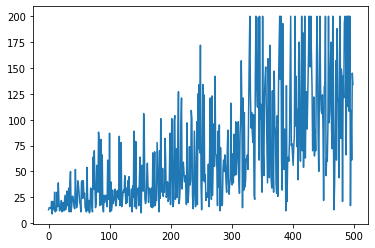

In [19]:
plt.plot(range(len(score)),score)

In [18]:
len(score)

500